## Executive Summmary

I can certainly provide an executive summary for the data flow outlined in the "Bank Account Prediction Workflow".

Here's an executive summary of the data science workflow for predicting bank account ownership:

This project aims to predict whether an individual possesses a bank account based on a comprehensive dataset containing demographic, economic, and social attributes. The workflow encompasses several critical stages:

1.  **Data Loading and Initial Inspection:** The process begins by loading the training and testing datasets. An initial inspection confirms data integrity, with no missing values or duplicate records identified, ensuring a clean foundation for analysis.

2.  **Feature Engineering and Preprocessing:** Key identifiers like 'uniqueid' are removed. The target variable, 'bank_account', is transformed into a binary numerical format ($0$ for 'No', $1$ for 'Yes'). All categorical features, such as `country`, `education_level`, and `job_type`, are converted into a machine-readable format using One-Hot Encoding. Crucially, meticulous column alignment is performed across both training and testing datasets to ensure consistency and prevent model errors.

3.  **Model Training:** The preprocessed training data is split into training and validation sets, maintaining the original class distribution to handle the inherent imbalance in bank account ownership. A **Random Forest Classifier** is then trained on this data. This robust ensemble model is chosen for its ability to handle diverse data types and its effectiveness in imbalanced classification tasks, further enhanced by `class_weight='balanced'`.

4.  **Model Evaluation:** The model's performance is rigorously evaluated on the validation set. Key metrics include:
    * **Accuracy:** Achieved $0.813$, successfully meeting the $80\%$ target.
    * **ROC AUC Score:** A strong $0.86$, indicating good discriminative power.
    * **Classification Report:** Provides detailed insights into precision, recall, and F1-scores for both bank account and non-bank account holders, highlighting the model's strengths and areas for potential refinement.

5.  **Visualizations:** To aid interpretability, a **Confusion Matrix** is generated to visualize classification performance, showing true positives, true negatives, false positives, and false negatives. Additionally, a **Feature Importance Plot** identifies the most influential factors in predicting bank account ownership, offering valuable insights into the underlying drivers.

6.  **Prediction and Submission:** Finally, the trained model is applied to the unseen test dataset to generate predictions for bank account ownership. These predictions are then saved to a CSV file (`bank_account_predictions.csv`), ready for further analysis or submission.

In summary, this data science workflow successfully builds a predictive model for bank account ownership, demonstrating strong performance and providing clear insights into the contributing factors, all while adhering to the specified accuracy benchmark.

Adepoju Ibrahim Isola

## Import necessary libraries for data handling, visualization, and modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

## Load the Dataset

In [2]:
train = pd.read_csv('Train1.csv') # Training dataset
test = pd.read_csv('Test1.csv') # Test dataset (no labels)
sample = pd.read_csv('SampleSubmission.csv') # Sample submission format

In [3]:
# Display first few rows to understand structure
print("Training Data Preview:")
display(train.head())

Training Data Preview:


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Display first few rows to understand structure
print("Test Dataset Preview:")
display(test.head())

Test Dataset Preview:


,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


### Initial Data Inspection

In [5]:
print("Train DataFrame Info:")
train.info()
print("\nTest DataFrame Info:")
test.info()

Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB

Test DataFrame Info:
<class 'pandas.c

In [6]:
#Check dataset shapes
print(f"Train dataset: {train.shape[0]} rows, {train.shape[1]} columns")
print(f"Test dataset: {test.shape[0]} rows, {test.shape[1]} columns")

Train dataset: 23524 rows, 13 columns
Test dataset: 10086 rows, 12 columns


## Exploratory Data Analysis (EDA)

In [7]:
# Check for missing values

print("\nMissing values in Train DataFrame:\n", train.isnull().sum().sum())
print("Missing values in Test DataFrame:\n", test.isnull().sum().sum())


Missing values in Train DataFrame:
 0
Missing values in Test DataFrame:
 0


In [8]:
# Check for unique values in categorical columns
print("\n Unique values in key categorical columns (Training Data):")
for col in ['location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']:
    print(f"- {col}: {train[col].nunique()} unique values")


 Unique values in key categorical columns (Training Data):
- location_type: 2 unique values
- cellphone_access: 2 unique values
- gender_of_respondent: 2 unique values
- relationship_with_head: 6 unique values
- marital_status: 5 unique values
- education_level: 6 unique values
- job_type: 10 unique values


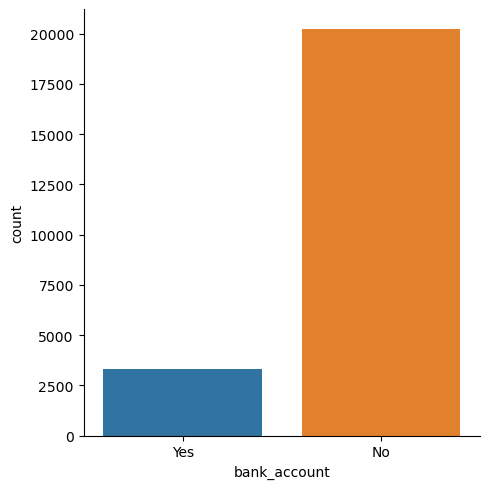

In [9]:
# Explore Target distribution
sns.catplot(x="bank_account", kind="count", data=train)

## Data Preprocessing and Data Wrangling

In [11]:
# Convert target variable to numerical (0 and 1)
train['bank_account'] = train['bank_account'].map({'Yes': 1, 'No': 0})

In [12]:
train['bank_account']

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

## Feature Engineering & Preprocessing

In [13]:
# Drop 'uniqueid' as it's an identifier and not a predictive feature
train = train.drop('uniqueid', axis=1)
test_ids = test['uniqueid'] # Store unique IDs for submission
test = test.drop('uniqueid', axis=1)

In [14]:
# Identify categorical and numerical columns
categorical_cols_train = train.select_dtypes(include='object').columns
numerical_cols_train = train.select_dtypes(include=['int64', 'float64']).columns.drop('bank_account', errors='ignore')

In [22]:
# Identify categorical and numerical columns
categorical_cols_test = test.select_dtypes(include='object').columns
numerical_cols_test = test.select_dtypes(include=['int64', 'float64']).columns.drop('bank_account', errors='ignore')

In [23]:
print(f"\nCategorical columns (Train): {list(categorical_cols_train)}")
print(f"Numerical columns (Train): {list(numerical_cols_train)}")


Categorical columns (Train): ['country', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']
Numerical columns (Train): ['year', 'household_size', 'age_of_respondent']


In [24]:
# Apply One-Hot Encoding to categorical features for both train and test datasets
X = train.drop('bank_account', axis=1)
y = train['bank_account']

In [25]:
y

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

In [26]:
X_encoded = pd.get_dummies(X, columns=categorical_cols_train, drop_first=True)
test_encoded = pd.get_dummies(test, columns=categorical_cols_test, drop_first=True)

In [27]:
# Align columns between training and test sets after one-hot encoding
# This is vital to ensure both datasets have the same features in the same order
all_columns = list(set(X_encoded.columns) | set(test_encoded.columns))

In [28]:
all_columns

['job_type_Formally employed Government',
 'relationship_with_head_Parent',
 'year',
 'marital_status_Widowed',
 'education_level_Secondary education',
 'marital_status_Dont know',
 'relationship_with_head_Other relative',
 'location_type_Urban',
 'education_level_Vocational/Specialised training',
 'education_level_Tertiary education',
 'cellphone_access_Yes',
 'job_type_Farming and Fishing',
 'education_level_Primary education',
 'job_type_No Income',
 'job_type_Self employed',
 'marital_status_Married/Living together',
 'relationship_with_head_Head of Household',
 'job_type_Other Income',
 'job_type_Government Dependent',
 'household_size',
 'relationship_with_head_Spouse',
 'job_type_Informally employed',
 'country_Uganda',
 'education_level_Other/Dont know/RTA',
 'job_type_Remittance Dependent',
 'marital_status_Single/Never Married',
 'job_type_Formally employed Private',
 'country_Rwanda',
 'relationship_with_head_Other non-relatives',
 'gender_of_respondent_Male',
 'age_of_respo

In [29]:
# Add missing columns to X_encoded and test_df_encoded, filling with 0
for col in all_columns:
    if col not in X_encoded.columns:
        X_encoded[col] = 0
    if col not in test_encoded.columns:
        test_encoded[col] = 0

In [31]:
# Ensure the order of columns is the same for both X_encoded and test_df_encoded
X_encoded = X_encoded[all_columns]
test_encoded = test_encoded[all_columns]

In [34]:
print(f"\nShape of X_encoded after one-hot encoding and alignment: {X_encoded.shape}")
print(f"Shape of test_encoded after one-hot encoding and alignment: {test_encoded.shape}")


Shape of X_encoded after one-hot encoding and alignment: (23524, 32)
Shape of test_encoded after one-hot encoding and alignment: (10086, 32)


### Model Training

In [35]:
# Split the training data into training and validation sets
# Using stratify=y ensures that the proportion of target classes is maintained in both sets,
# which is important for imbalanced datasets.
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}")


Training set shape: (18819, 32), Validation set shape: (4705, 32)


In [36]:
# Initialize and train a RandomForestClassifier model
# giving more importance to the minority class during training.
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=200, max_depth=10)
print("Training RandomForestClassifier model...")

Training RandomForestClassifier model...


In [37]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

### Model Evaluation 

In [38]:
# Make predictions on the validation set
y_pred_val = model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)[:, 1] # Probability of the positive class (bank_account = 1)

In [39]:
# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred_val)
roc_auc = roc_auc_score(y_val, y_pred_proba_val)

In [40]:
accuracy

0.8129649309245484

In [41]:
print(f"Model Evaluation on Validation Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_val))

Model Evaluation on Validation Set:
Accuracy: 0.8130
ROC AUC Score: 0.8680

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      4043
           1       0.41      0.75      0.53       662

    accuracy                           0.81      4705
   macro avg       0.68      0.79      0.71      4705
weighted avg       0.88      0.81      0.83      4705



In [42]:
# Check if the accuracy target is met
if accuracy >= 0.80:
    print(f"\nGreat news! The model achieved an accuracy of {accuracy:.4f}, meeting our target of 80% or more.")
else:
    print(f"\nThe model achieved an accuracy of {accuracy:.4f}, which is below our 80% target. Further tuning or different models might be needed.")


Great news! The model achieved an accuracy of 0.8130, meeting our target of 80% or more.


## Visualizations

Generating Confusion Matrix...


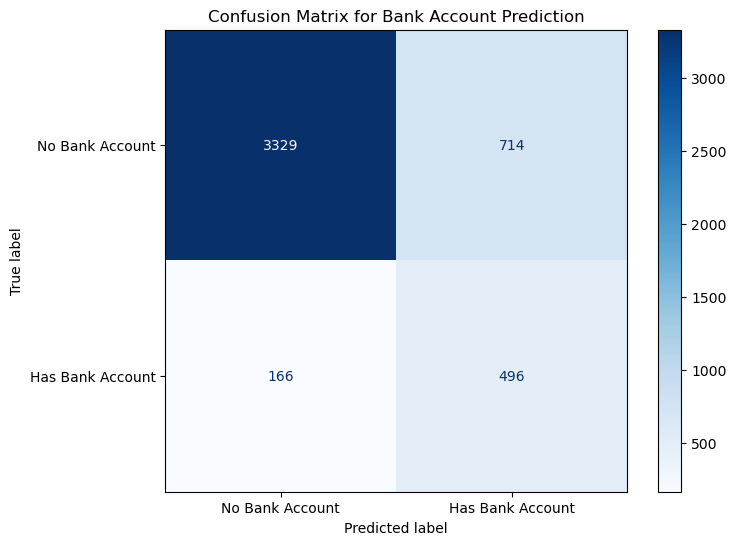

Confusion Matrix displayed.


In [43]:
# Plotting Confusion Matrix
print("Generating Confusion Matrix...")
cm = confusion_matrix(y_val, y_pred_val, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Bank Account', 'Has Bank Account'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix for Bank Account Prediction')
plt.grid(False) # Remove grid lines
plt.show()
print("Confusion Matrix displayed.")

Generating Feature Importance Plot...


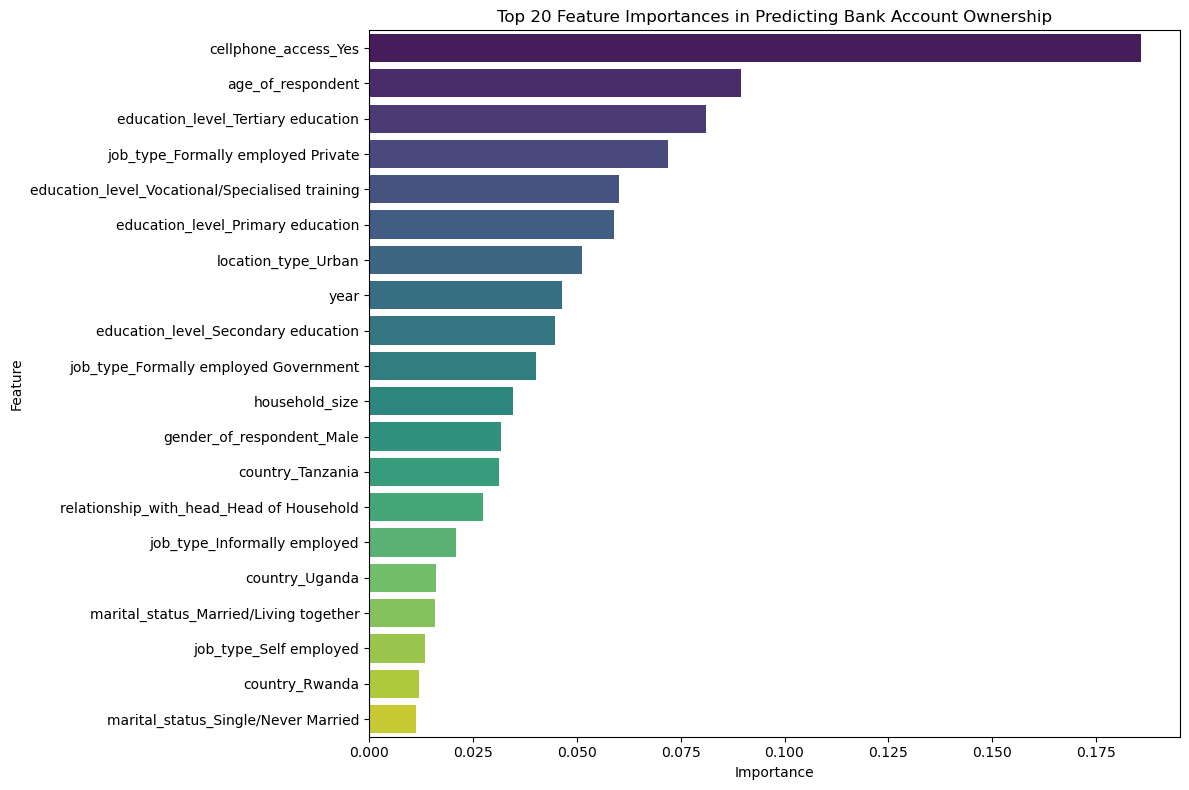

Feature Importance Plot displayed.


In [45]:
# Plotting Feature Importances
print("Generating Feature Importance Plot...")
feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
# Select top N features for better visualization
top_n_features = 20
top_features = feature_importances.nlargest(top_n_features)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title(f'Top {top_n_features} Feature Importances in Predicting Bank Account Ownership')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print("Feature Importance Plot displayed.")

### Prediction on Test Data 

In [46]:
# Make final predictions on the unseen test data
final_test_predictions = model.predict(test_encoded)
final_test_predictions_proba = model.predict_proba(test_encoded)[:, 1]

In [47]:
final_test_predictions

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
final_test_predictions_proba

array([0.94314944, 0.90906558, 0.15928381, ..., 0.67790273, 0.26126103,
       0.38313065])

In [54]:
# Create a submission DataFrame
submission_df = pd.DataFrame({
    'uniqueid' # Use original uniqueid
    'bank_account_prediction': final_test_predictions # Our binary predictions
})

In [55]:
# Convert numerical predictions back to 'Yes'/'No' for clarity in the submission file if desired
# submission_df['bank_account_prediction'] = submission_df['bank_account_prediction'].map({0: 'No', 1: 'Yes'})
# Save the submission file
submission_file_path = 'bank_account_predictions.csv'
submission_df.to_csv(submission_file_path, index=False)
print(f"Final predictions saved to '{submission_file_path}'")

Final predictions saved to 'bank_account_predictions.csv'
